In [162]:
import asyncio
import ssl
from functools import reduce

import nest_asyncio
import pandas as pd
import requests

ssl._create_default_https_context = ssl._create_unverified_context
nest_asyncio.apply()

In [163]:
BASELINE = 150000

In [164]:
async def _get_df(title):
    df = pd.read_html(
        f"https://h1bdata.info/index.php?em=&job={title}&city=&year=All+Years")[0]
    if len(df) == 0:
        return
    df['BASE SALARY'] = df['BASE SALARY'].apply(
        lambda x: float(x) if type(x) in (float, int) else (float(x) if x.isdigit() else 0.0))
    df = df[df['BASE SALARY'] > BASELINE]
    return df

In [165]:
async def main():
    tasks = []
    titles_quantitative = ['quantitative+researcher', 'quantitative+trader', 'quantitative+research+analyst', 'quantitative+portfolio+manager', 'quantitative+analyst',
                       'quantitative+developer', 'quantitative+software+engineer', 'quantitative+research+engineer', 'quantitative+engineer', 'quantitative+strategist', 'quantitative+investment+analyst']
    titles_quant = [_.replace('quantitative', 'quant') for _ in titles_quantitative]
    titles = titles_quantitative + titles_quant
    for title in titles:
        tasks.append(_get_df(title))
    
    dfs = await asyncio.gather(*tasks)
    return dfs

In [166]:
dfs = asyncio.run(main())
df = reduce(lambda df1, df2: pd.concat([df1, df2], ignore_index=True), dfs)
df = df.sort_values(by="BASE SALARY", ascending=False)

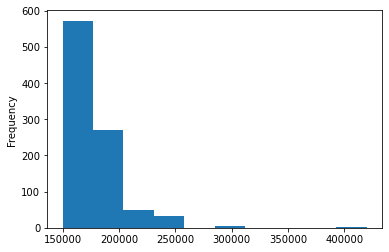

In [167]:
df['BASE SALARY'].plot(kind='hist')

In [168]:
df.describe()

,BASE SALARY
count,931.000000
mean,181857.902256
std,24320.362432
min,150010.000000
25%,165000.000000
50%,175000.000000
75%,190775.000000
max,420000.000000


In [172]:
len(df['EMPLOYER'].unique())

147

In [171]:
for _ in df['EMPLOYER'].unique(): print(_)

QUANTEDGE USA INC
TOWER RESEARCH CAPITAL LLC
GOTHAM ASSET MANAGEMENT LLC
CITIGROUP GLOBAL MARKETS INC
POINT72 ASSET MANAGEMENT LP
BLOOMBERG LP
TWO SIGMA INVESTMENTS LP
CITADEL ENTERPRISE AMERICAS LLC
DRW HOLDINGS LLC
IEX GROUP INC
CITADEL AMERICAS LLC
D E SHAW & CO LP
BOULDER HILL CAPITAL MANAGEMENT LP
SQUAREPOINT OPS LLC
SEVEN EIGHT CAPITAL LP
GTS SECURITIES LLC
JUMP OPERATIONS LLC
BALYASNY ASSET MANAGEMENT LP
TOKENS TRADING LLC
ERGOTELES LLC
DW PARTNERS LP
HBK NEW YORK LLC
RBC CAPITAL MARKETS LLC
CITADEL SECURITIES AMERICAS LLC
ELLIOTT MANAGEMENT CORPORATION
BLUEMOUNTAIN CAPITAL MANAGEMENT LLC
TUDOR INVESTMENT CORPORATION
GRAHAM CAPITAL MANAGEMENT LP
CITADEL LLC
INSIGHT INVESTMENT
AIG ASSET MANAGEMENT (US) LLC
3RED PARTNERS LLC
BLOOMBERG TRADEBOOK LLC
THE VANGUARD GROUP
HRT TECHNOLOGY LLC
CITIBANK NA
FACEBOOK INC
TGS MANAGEMENT COMPANY LLC
LATOUR TRADING LLC
BOERBOEL LLC
OLD MISSION CAPITAL LLC
LAURION CAPITAL MANAGEMENT LP
KCG AMERICAS LLC
THE CLIMATE CORPORATION
VATIC LABS OPERATIO